In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('GOOGL.csv')
data = data['Close'].values.reshape(-1, 1)  # focusing on closing prices

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create a function to process the data into 7-day look back slices
def create_dataset(dataset, look_back=7):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 7
X, Y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # reshape input to be [samples, time steps, features]

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\heman\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
model.fit(X, Y, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
4423/4423 - 44s - 10ms/step - loss: 7.1132e-04
Epoch 2/20
4423/4423 - 40s - 9ms/step - loss: 2.7977e-04
Epoch 3/20
4423/4423 - 39s - 9ms/step - loss: 2.2591e-04
Epoch 4/20
4423/4423 - 38s - 9ms/step - loss: 2.1495e-04
Epoch 5/20
4423/4423 - 39s - 9ms/step - loss: 1.2491e-04
Epoch 6/20
4423/4423 - 36s - 8ms/step - loss: 1.3557e-04
Epoch 7/20
4423/4423 - 37s - 8ms/step - loss: 1.4691e-04
Epoch 8/20
4423/4423 - 38s - 9ms/step - loss: 1.0242e-04
Epoch 9/20
4423/4423 - 39s - 9ms/step - loss: 9.5232e-05
Epoch 10/20
4423/4423 - 38s - 9ms/step - loss: 1.0154e-04
Epoch 11/20
4423/4423 - 37s - 8ms/step - loss: 8.8199e-05
Epoch 12/20
4423/4423 - 40s - 9ms/step - loss: 8.1847e-05
Epoch 13/20
4423/4423 - 38s - 9ms/step - loss: 7.7205e-05
Epoch 14/20
4423/4423 - 37s - 8ms/step - loss: 8.0970e-05
Epoch 15/20
4423/4423 - 39s - 9ms/step - loss: 7.0743e-05
Epoch 16/20
4423/4423 - 40s - 9ms/step - loss: 7.6619e-05
Epoch 17/20
4423/4423 - 39s - 9ms/step - loss: 7.5672e-05
Epoch 18/20
4423/4423 

139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


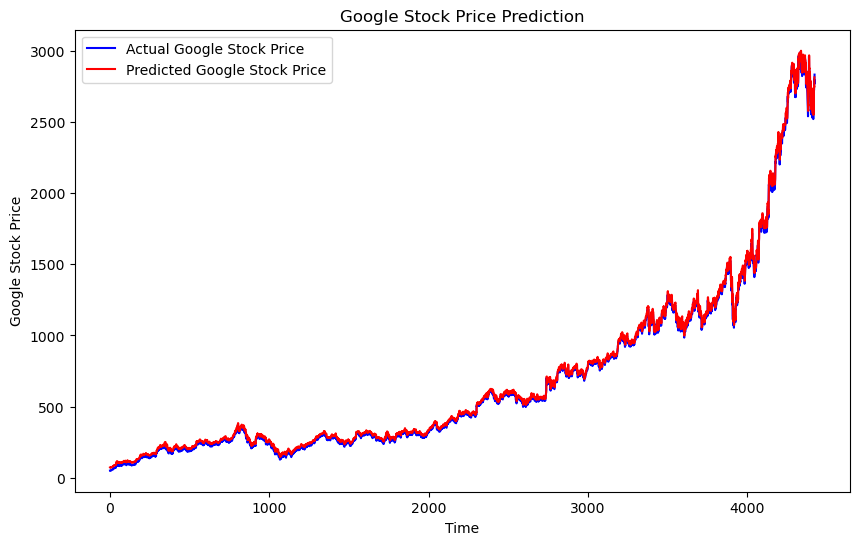

In [4]:
# make predictions
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)  # inverse transform to get actual stock price

# plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_scaled[look_back:]), color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()